# Igraph introduction

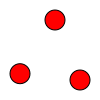

In [1]:
# importing packages
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# initilize an undirected empty graph
g = ig.Graph()

# adding 3 vertices
g.add_vertices(3)
ig.plot(g, bbox = (100,100))

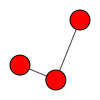

In [2]:
# add an edge from 0 to 1 and from 1 to 2
g.add_edges([(0,1), (1,2)])
ig.plot(g, bbox = (100, 100))

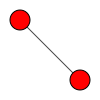

In [4]:
# delete the 2nd vertex
g.delete_vertices(2)
ig.plot(g, bbox = (100, 100))

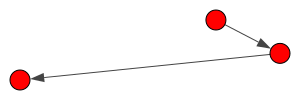

In [5]:
# initializing a directed graph
g = ig.Graph(directed = True)

# add vertices and edges
g.add_vertices(3)
g.add_edges([(0, 1), (1, 2)])
ig.plot(g, bbox = (300, 100))

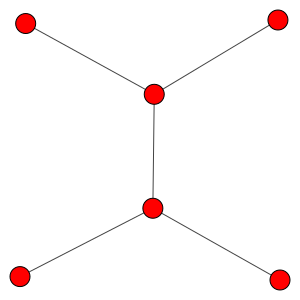

In [6]:
# creating tree
g = ig.Graph.Tree(6,3)
ig.plot(g, bbox = (300,300))

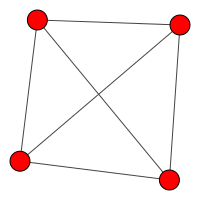

In [7]:
# creating full graph
g = ig.Graph.Full(4)
ig.plot(g, bbox = (200,200))

In [8]:
g = ig.Graph( [(0,1), (0,2), (0,3),(1,2),(1,4),(2,5),(2,4),(3,5),(4,6),(5,6)])
print g

IGRAPH U--- 7 10 --
+ edges:
0 -- 1 2 3     2 -- 0 1 4 5   4 -- 1 2 6     6 -- 4 5
1 -- 0 2 4     3 -- 0 5       5 -- 2 3 6


In [9]:
# name vertices
g.vs["name"] = ["MA", "HD", "SP", "KA", "S", "F", "M"]
# name the labels of the vertices
g.vs["label"] = g.vs["name"]
print g

IGRAPH UN-- 7 10 --
+ attr: label (v), name (v)
+ edges (vertex names):
MA -- HD, SP, KA     KA -- MA, F           M -- S, F
HD -- MA, SP, S       S -- HD, SP, M
SP -- MA, HD, S, F    F -- SP, KA, M


In [10]:
# plot graph
ig.plot(g,layout = g.layout("sugiyama"), inline = False)

In [ ]:
ig.summary(g)

In [11]:
# set edge weight true
g.es["weight"] = 1.0
# add weights to graph
g.es["weight"] = [5, 6, 6, 4, 7, 5, 4, 5, 7]
ig.plot(g,layout = g.layout("sugiyama"), edge_width = g.es["weight"], inline = False)

In [12]:
ig.summary(g)

IGRAPH UNW- 7 10 -- 
+ attr: label (v), name (v), weight (e)


# Example of hub and auth. score on a citation network

In [13]:
##
# L. A. Adamic and N. Glance, 
# "The political blogosphere and the 2004 US Election", 
# in Proceedings of the WWW-2005 Workshop on the Weblogging Ecosystem (2005)
##

# importing the Data Set
g = ig.Graph.Read_GML("polblogs.gml")
ig.summary(g)

IGRAPH D--- 1490 19090 -- 
+ attr: id (v), label (v), source (v), value (v)


In [14]:
# calculating the hub score and selecting the top n pages
n = 10
hubscore = np.asarray(g.hub_score())
hubtop = np.argsort(hubscore)[::-1]
d = {"hub score top":hubscore[hubtop[:n]]}
labels = np.asarray(g.vs["label"])
pd.DataFrame(d, index=labels[hubtop[:n]])

,hub score top
politicalstrategy.org,1.000000
madkane.com/notable.html,0.906115
liberaloasis.com,0.893959
stagefour.typepad.com/commonprejudice,0.872931
bodyandsoul.typepad.com,0.864138
corrente.blogspot.com,0.843065
atrios.blogspot.com/,0.825615
tbogg.blogspot.com,0.806487
newleftblogs.blogspot.com,0.805398
atrios.blogspot.com,0.798752


In [15]:
# calculating the hub score step by step
A = np.matrix(g.get_adjacency().data)
AAt =  A * A.transpose()
w, v = np.linalg.eig(AAt)
maxeigen =  np.argmax(w)
maxv =  max(v[:,maxeigen])
hubscore = np.multiply((1/maxv), v[:,maxeigen])
hubscore = hubscore.A1

hubtop = np.argsort(hubscore)[::-1]
d = {"hub score top": hubscore[hubtop[:n]]}
labels = np.asarray(g.vs["label"])
pd.DataFrame(d, index=labels[hubtop[:n]])

,hub score top
politicalstrategy.org,(1+0j)
madkane.com/notable.html,(0.906114550041+0j)
liberaloasis.com,(0.893959275526+0j)
stagefour.typepad.com/commonprejudice,(0.872931025315+0j)
bodyandsoul.typepad.com,(0.864137673427+0j)
corrente.blogspot.com,(0.843064576374+0j)
atrios.blogspot.com/,(0.825614592742+0j)
tbogg.blogspot.com,(0.806486889157+0j)
newleftblogs.blogspot.com,(0.805397680157+0j)
atrios.blogspot.com,(0.7987524263+0j)


In [16]:
# calculating the auth. score and slecting the top n pages
authscore = np.asarray(g.authority_score())
authtop = np.argsort(authscore)[::-1]
d = {"auth. score top": authscore[authtop[:n]]}
pd.DataFrame(d, index=labels[authtop[:n]])

,auth. score top
dailykos.com,1.000000
talkingpointsmemo.com,0.961743
atrios.blogspot.com,0.936102
washingtonmonthly.com,0.787870
talkleft.com,0.647401
instapundit.com,0.640788
juancole.com,0.627468
yglesias.typepad.com/matthew,0.596396
pandagon.net,0.587727
digbysblog.blogspot.com,0.579582


In [17]:
# top 10 auth. and hub scores
d = {"auth. top": labels[authtop[:n]], "hub top": labels[hubtop[:n]]}
pd.DataFrame(d)

,auth. top,hub top
0,dailykos.com,politicalstrategy.org
1,talkingpointsmemo.com,madkane.com/notable.html
2,atrios.blogspot.com,liberaloasis.com
3,washingtonmonthly.com,stagefour.typepad.com/commonprejudice
4,talkleft.com,bodyandsoul.typepad.com
5,instapundit.com,corrente.blogspot.com
6,juancole.com,atrios.blogspot.com/
7,yglesias.typepad.com/matthew,tbogg.blogspot.com
8,pandagon.net,newleftblogs.blogspot.com
9,digbysblog.blogspot.com,atrios.blogspot.com


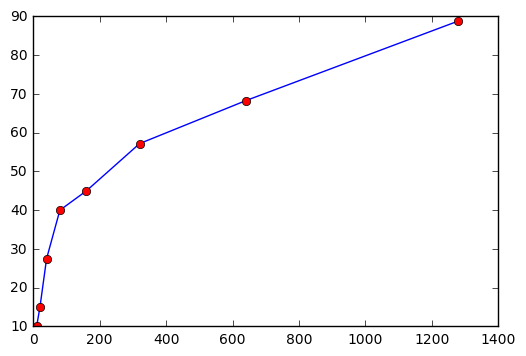

In [18]:
# calculating how many blogs are in the top k hub and auth.
k = [10, 20, 40, 80, 160, 320, 640, 1280]
same = np.zeros(np.size(k))
counter = 0
for n in k:
    same[counter] = 0
    for i in range(0,n):
        for j in range(0,n):
            if labels[authtop[i]] == labels[hubtop[j]]:
                same[counter] += 1
    counter += 1
plt.plot(k,same/k * 100,'blue')
plt.plot(k,same/k * 100,'ro')
plt.show()

In [ ]:
ig.plot(g, inline=Fa)